### Sentiment analysis of tweets
Import packages

In [68]:
import plotly.express as px
import datetime
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
import nltk
nltk.download('wordnet')
from wordcloud import STOPWORDS, WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ishandahal/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Prepping the data

In [42]:
df = pd.read_csv("trump_insult_tweets_2014_to_2021.csv.zip")

In [43]:
df.tail()

,Unnamed: 0,date,target,insult,tweet
10355,10356,2021-01-06,2020-election,Many States want to decertify the mistake they...,If Vice President @Mike_Pence comes through fo...
10356,10357,2021-01-06,2020-election,"based on irregularities and fraud, plus corrup...","States want to correct their votes, which they..."
10357,10358,2021-01-06,2020-election,Our Election Process is worse than that of thi...,"They just happened to find 50,000 ballots late..."
10358,10359,2021-01-06,2020-election,a FRAUD,The States want to redo their votes. They foun...
10359,10360,2021-01-06,chuck-todd,"Sleepy Eyes, Sad to watch!",Sleepy Eyes Chuck Todd is so happy with the fa...


In [44]:
df.shape

(10360, 5)

Checking for missing values

In [45]:
df.isna().sum()

Unnamed: 0    0
date          0
target        2
insult        0
tweet         0
dtype: int64

We have two "nan" values which we will subsitute with "unknown"

In [46]:
df = df.fillna("Unknown")

In [47]:
df.isna().sum() / len(df)

Unnamed: 0    0.0
date          0.0
target        0.0
insult        0.0
tweet         0.0
dtype: float64

Most frequently targeted 

In [48]:
Trumptargets = pd.DataFrame(df.groupby("target")["target"].count()).rename(columns={"target":"#ofattacks"}).reset_index().sort_values(by="#ofattacks").reset_index(drop=True)
Trumptargets

,target,#ofattacks
0,judge-appointments-delay-tactics,1
1,lebron-james,1
2,laws-about-sanctuary-cities,1
3,la-dodgers-relievers,1
4,kristen-welker,1
...,...,...
862,joe-biden,402
863,trump-russia,441
864,hillary-clinton,625
865,democrats,647


867 unique entities were insulted since October 2014

In [49]:
Trumptargets_ = Trumptargets[Trumptargets["#ofattacks"] > 50]
Trumptargets_

,target,#ofattacks
839,mail-in-voting,53
840,barack-obama,60
841,bernie-sanders,66
842,the-fed,66
843,nbc-news,67
844,msnbc,73
845,chuck-schumer,75
846,obamacare,77
847,fox-news,81
848,marco-rubio,82


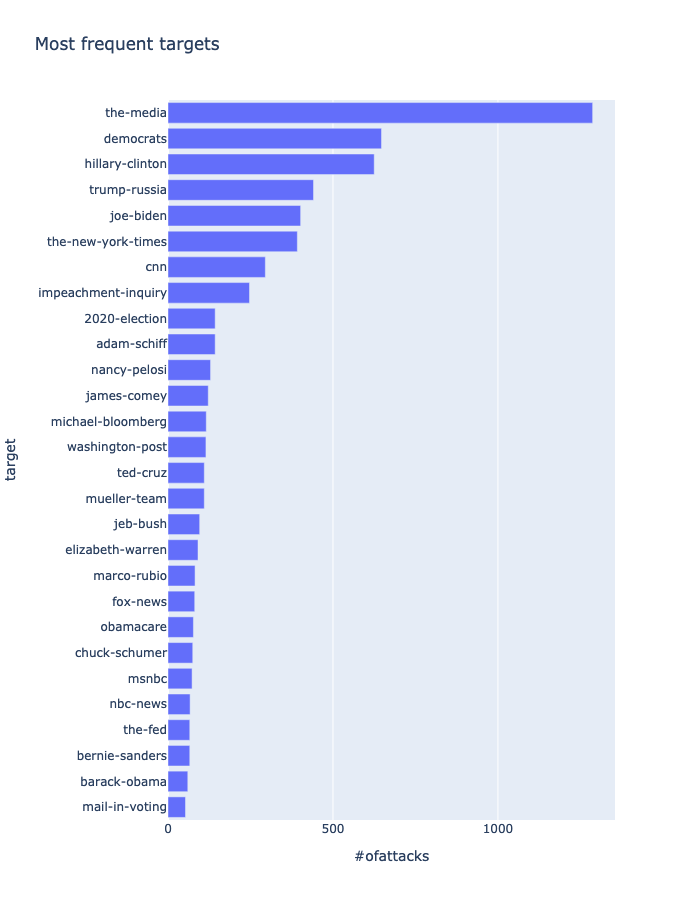

In [50]:
fig = px.bar(Trumptargets_, x="#ofattacks", y="target", orientation="h", height=900,
            title="Most frequent targets")
fig.show()

Looks like the media was at the receiving close to 1300 hateful messages. This is ~ twice as much as the second highest recipient which are the democrats.

How did the final days of Trump look like?

In [51]:
df['year'] = pd.DatetimeIndex(df["date"]).year
df['month'] = pd.DatetimeIndex(df["date"]).month
df['day'] = pd.DatetimeIndex(df["date"]).day

In [52]:
df_2 = df[df["year"] > 2020]

In [53]:
df_2.shape

(27, 8)

In [54]:
df_2.tail()

,Unnamed: 0,date,target,insult,tweet,year,month,day
10355,10356,2021-01-06,2020-election,Many States want to decertify the mistake they...,If Vice President @Mike_Pence comes through fo...,2021,1,6
10356,10357,2021-01-06,2020-election,"based on irregularities and fraud, plus corrup...","States want to correct their votes, which they...",2021,1,6
10357,10358,2021-01-06,2020-election,Our Election Process is worse than that of thi...,"They just happened to find 50,000 ballots late...",2021,1,6
10358,10359,2021-01-06,2020-election,a FRAUD,The States want to redo their votes. They foun...,2021,1,6
10359,10360,2021-01-06,chuck-todd,"Sleepy Eyes, Sad to watch!",Sleepy Eyes Chuck Todd is so happy with the fa...,2021,1,6


In [55]:
print(f"Trump's last hateful message:\n{df_2.loc[10359][3]} \n\nWhich was aimed at \n{df_2.loc[10359][2]}")

Trump's last hateful message:
Sleepy Eyes,  Sad to watch! 

Which was aimed at 
chuck-todd


In [56]:
Trumptargets__ = pd.DataFrame(df_2.groupby("target")["target"].count()).rename(columns =\
                {"target" : "#ofattacks"}).reset_index().sort_values(by="#ofattacks").reset_index(drop=True)
Trumptargets__

,target,#ofattacks
0,antifa,1
1,brad-raffensperger,1
2,cdc,1
3,chuck-todd,1
4,democrats,1
5,fox-news,1
6,geoff-duncan,1
7,john-thune,1
8,mike-pence,1
9,the-media,1


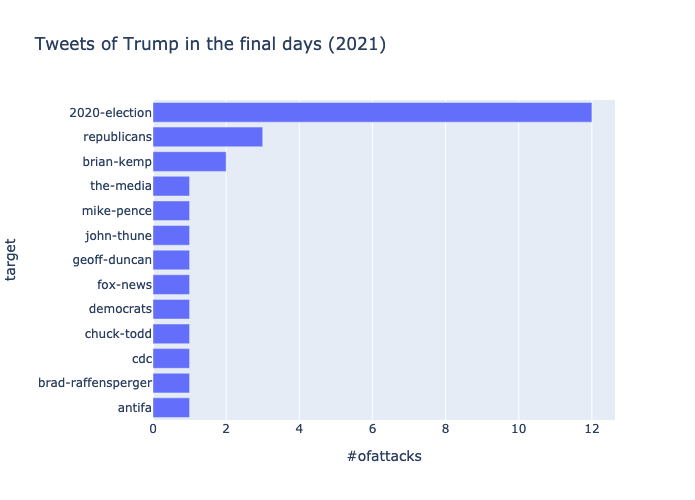

In [57]:
fig = px.bar(Trumptargets__, x="#ofattacks", y="target", height=500,
            title="Tweets of Trump in the final days (2021)")
fig.show()

Main target of the tweets were at the 2020 election. 
The tweets stop on the 6th Jan, so on average there were 2 daily tweets aimed at the election.

#### Sentiment Analysis

###### WordCloud

In [62]:
stopwords = set(STOPWORDS)

In [63]:
text1 = df_2["tweet"].to_csv()
tweet1_wc = WordCloud(
        background_color='white',
        max_words=1000,
        stopwords=stopwords)

tweet1_wc.generate(text1)

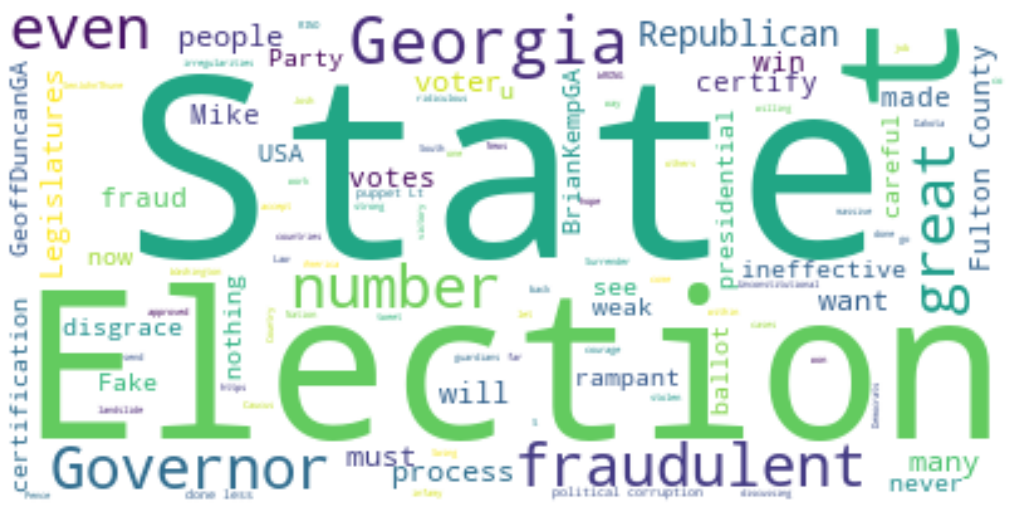

In [64]:
plt.figure(figsize=(18, 18))
plt.imshow(tweet1_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

The more frequent a word appears in the data, the larger it appears in the plot. From the above plot it is seems like the words most likely associated with the election and it's outcome were most frequent.

How about the pandemic, economic condition and other pressing issues? 

In [70]:
stemmer = SnowballStemmer("english", ignore_stopwords=True)
text_1 = df_2["tweet"].to_csv()
tokenizer = RegexpTokenizer(r"\w+")
word_tokens = tokenizer.tokenize(text_1)
filtered_sentence = [w for w in word_tokens if not w in stopwords]

filtered_sentence = []

for w in word_tokens:
    if w not in stopwords:
        lemmatizer = WordNetLemmatizer()
        w = lemmatizer.lemmatize(w)
        w = stemmer.stem(w)
        filtered_sentence.append(w)

In [71]:
split_it = str(filtered_sentence).split()

In [72]:
from collections import Counter
Counter = Counter(split_it)
most_occur = Counter.most_common(60)

In [79]:
frequentwords = pd.DataFrame(most_occur).rename(columns={0:"words", 1:"Frequencies"}).\
                sort_values(by="Frequencies").reset_index(drop=True)

In [81]:
frequentwords = frequentwords.drop(index=[6, 7, 15, 26, 41, 47, 56, 57]).reset_index(drop=True)
frequentwords

,words,Frequencies
0,"'senjohnthun',",2
1,"'hope',",2
2,"'rino',",2
3,"'dakota',",2
4,"'south',",2
5,"'see',",3
6,"'usa',",3
7,"'presidenti',",3
8,"'care',",3
9,"'polit',",3


Dropped indices are for words that are irrelevant. 

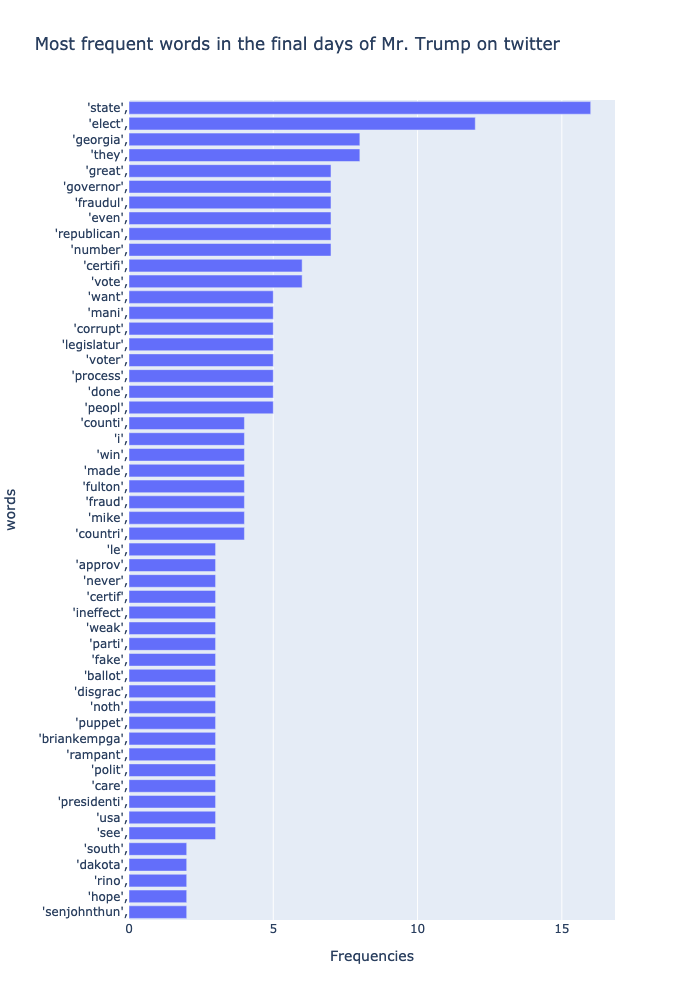

In [83]:
fig = px.bar(frequentwords, x="Frequencies", y="words", orientation="h", height=1000,
            title="Most frequent words in the final days of Mr. Trump on twitter")
fig.show()

Analysis of tweets posted by Mr. Trump that were not so nice. 
Since are only analysing the rude tweets there is a point of bias. 
Something that stands out is the priority if Mr. Trump during the final days of the presidency which based on the avaiable tweets here are focused on the outcome of the election. 

A cool step for exploration could be to gather the positive and neutral tweets as well and see what picture emerges.